In [1]:
#단순회귀분석
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#파라미터 설정(실험을 통해 구해야 하는 값)
learning_rate = 0.01 #학습률
epochs = 1000 #학습횟수
step_display = 50 #진행 상태를 출력할 단계

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#회귀분석 : 전기생산량과 소비량
# 월별 전기생산금액(억원)
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

#월별 전기 사용량(백만 kwh)
y =[2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

In [3]:
#가중치(weight)와 절편(bias)
#tf.random_uniform([1] 변수의 형태, -1.0 최소값, 1.0 최대값) 무작위수 초기화
# -1.0 ~ 1.0 사이의 값 생성
# name: 값으 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙임
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias')

In [4]:
#placeholder: 학습용 데이터를 담는 그릇
# 그래프에서 x(입력값)을 저장하는 저장소
# placeholder(dtype, shape, name): 자료형, 행렬의 차원, 이름

X = tf.placeholder(dtype=tf.float32, name='X')
Y = tf.placeholder(dtype=tf.float32, name='Y')

In [5]:
# X와 Y의 상관 관계를 분석하기 위한 가설 수식 작성
# y = W * x + b
y_pred = tf.add(tf.multiply(weight, X), bias)
#손실함수(비용함수) : 예측값과 실제값의 거리를 계산하는 함수
cost = tf.reduce_mean(tf.square(y_pred - Y))
#비용을 최소화
#AdamOptimizer : 현재 가장 성능이 좋은 알고리즘
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [6]:
#변수 초기화
init = tf.global_variables_initializer()
#세션 생성 및 시작
sess = tf.Session()
sess.run(init)

In [7]:
#optimizer와 cost를 그래프에서 계산
#cost 계산: 정해진 데이터셋에서 한 샘플씩 불러와서 cost를 계산,
#optimizer 계산: cost로부터 error를 계산 후,
#모델에 대한 편미분을 자동으로 계산해주는 과정을 이용하여 모델 W, b 를 수정
for epoch in range(epochs):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X:x, Y:y})
    if (epoch + 1) % step_display == 0:
        print('Epoch:{0}, cost:{1}, weight:{2}, bias:{3}'.format(epoch+1, cost_val,
        sess.run(weight), sess.run(bias)))

Epoch:50, cost:0.07126780599355698, weight:[0.81177706], bias:[-0.23589608]
Epoch:100, cost:0.05952810123562813, weight:[0.78472626], bias:[-0.22958477]
Epoch:150, cost:0.05756315588951111, weight:[0.77661496], bias:[-0.19597638]
Epoch:200, cost:0.0553596056997776, weight:[0.7669546], bias:[-0.15719242]
Epoch:250, cost:0.0530109740793705, weight:[0.75617397], bias:[-0.11438084]
Epoch:300, cost:0.050595175474882126, weight:[0.7445977], bias:[-0.06844688]
Epoch:350, cost:0.04817492887377739, weight:[0.732439], bias:[-0.02020308]
Epoch:400, cost:0.04580064117908478, weight:[0.71987647], bias:[0.02964334]
Epoch:450, cost:0.043512146919965744, weight:[0.70706725], bias:[0.08046917]
Epoch:500, cost:0.04134006053209305, weight:[0.6941507], bias:[0.1317218]
Epoch:550, cost:0.039306748658418655, weight:[0.6812503], bias:[0.18290997]
Epoch:600, cost:0.0374273881316185, weight:[0.66847587], bias:[0.233599]
Epoch:650, cost:0.035710740834474564, weight:[0.65592366], bias:[0.28340626]
Epoch:700, cos

In [8]:
training_cost = sess.run(cost, feed_dict={X:x, Y:y})
print('최종 cost:', cost_val)
print('정확도:', 100-cost_val)
print('최종 가중치:', sess.run(weight))
print('최종 절편:', sess.run(bias))

최종 cost: 0.028072886
정확도: 99.97192711383104
최종 가중치: [0.5799126]
최종 절편: [0.5850272]


In [9]:
#최적화가 완료된 모델을 테스트
print('X: 5, Y:', sess.run(y_pred, feed_dict={X:5}))
print('X: 2.5, Y:', sess.run(y_pred, feed_dict={X: 2.5}))

X: 5, Y: [3.4845903]
X: 2.5, Y: [2.0348086]


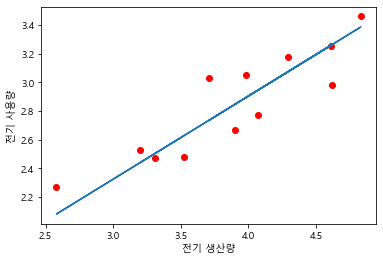

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

plt.plot(x, y, 'ro')
plt.plot(x,sess.run(weight)*x+sess.run(bias))
plt.xlabel('전기 생산량')
plt.ylabel('전기 사용량')
plt.show()